# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t30_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,138.476144,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
0,552.0,712.0,863.0,862.0,964.0,894.0,1025.0,1158.0,1268.0,1162.0,...,2214.0,2298.0,2250.0,2311.0,2299.0,2335.0,2395.0,2328.0,2394.0,2322.0
1,538.0,740.0,765.0,854.0,1006.0,968.0,1098.0,1096.0,1119.0,1220.0,...,2353.0,2432.0,2306.0,2350.0,2352.0,2490.0,2403.0,2443.0,2394.0,2556.0
2,547.0,693.0,852.0,881.0,987.0,909.0,1044.0,1154.0,1264.0,1291.0,...,2385.0,2503.0,2357.0,2556.0,2532.0,2488.0,2585.0,2444.0,2408.0,2541.0
3,539.0,738.0,777.0,842.0,981.0,912.0,1086.0,1129.0,1190.0,1346.0,...,2417.0,2523.0,2463.0,2508.0,2517.0,2475.0,2520.0,2468.0,2478.0,2697.0
4,573.0,677.0,870.0,745.0,1028.0,955.0,1085.0,1113.0,1231.0,1306.0,...,2399.0,2528.0,2439.0,2483.0,2472.0,2567.0,2452.0,2522.0,2436.0,2602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,522.0,603.0,764.0,789.0,873.0,881.0,986.0,996.0,1103.0,1128.0,...,1527.0,1606.0,1635.0,1648.0,1629.0,1656.0,1685.0,1770.0,1604.0,1769.0
380,509.0,679.0,698.0,761.0,885.0,829.0,978.0,975.0,1111.0,1102.0,...,1571.0,1562.0,1662.0,1597.0,1595.0,1734.0,1619.0,1612.0,1665.0,1736.0
381,469.0,573.0,756.0,722.0,870.0,823.0,939.0,1031.0,1078.0,1099.0,...,1563.0,1615.0,1556.0,1718.0,1781.0,1760.0,1582.0,1587.0,1702.0,1687.0
382,521.0,678.0,686.0,811.0,913.0,880.0,929.0,1027.0,1133.0,1108.0,...,1526.0,1590.0,1589.0,1691.0,1649.0,1712.0,1649.0,1658.0,1659.0,1696.0


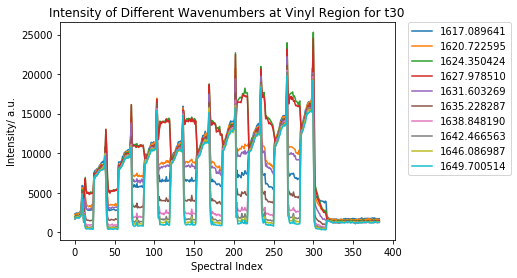

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t30')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1627.978510'] --> When using loc.
df.columns.get_loc('1627.978510') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1627.978510'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

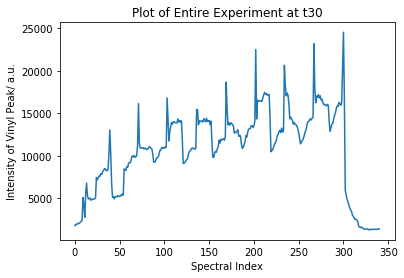

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:340,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t30')
plt.show()

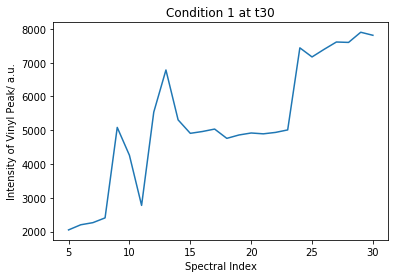

In [6]:
# Condition
df.loc[5:30,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t30')
plt.show()

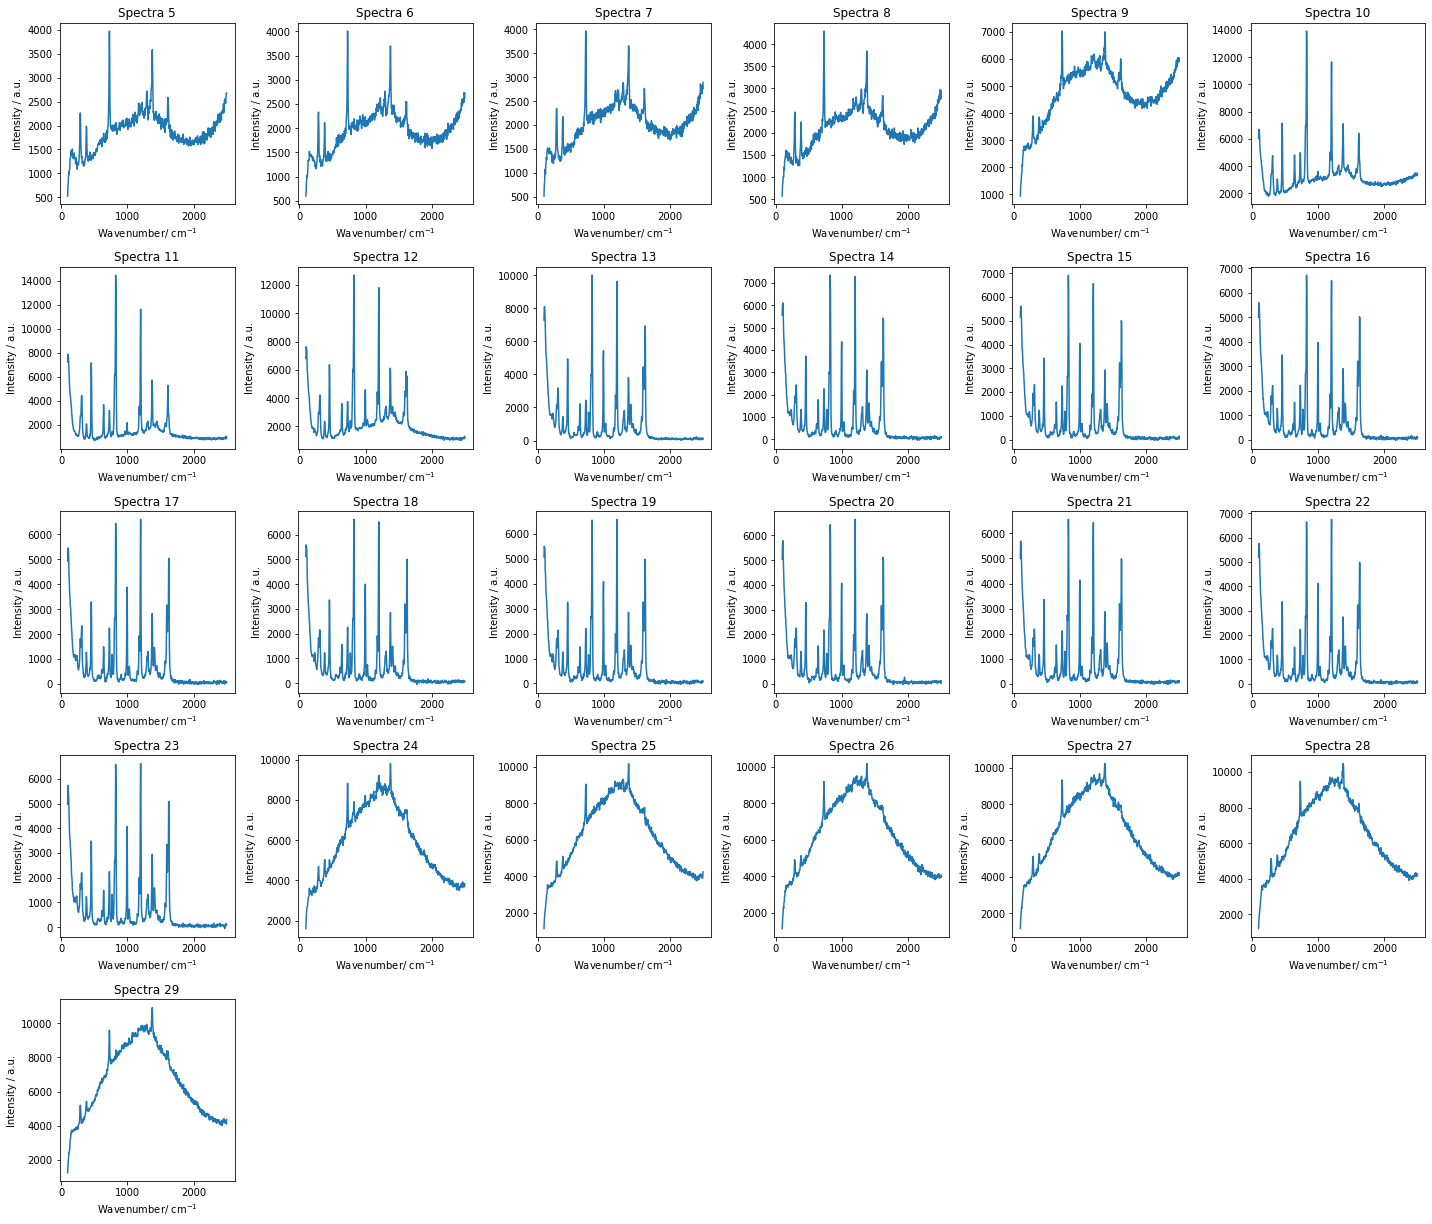

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(5, 30):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-4))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[17:21, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =19)
condition1_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
17,19,4939.0,5454.0,5421.0,5299.0,4721.0,4155.0,3954.0,3596.0,3421.0,...,-4.0,43.0,37.0,76.0,107.0,113.0,67.0,52.0,49.0,88.0
18,19,5121.0,5583.0,5504.0,5402.0,4996.0,4202.0,3885.0,3604.0,3346.0,...,79.0,96.0,81.0,82.0,116.0,92.0,68.0,42.0,63.0,65.0
19,19,5075.0,5508.0,5420.0,5411.0,4567.0,4407.0,3975.0,3560.0,3467.0,...,7.0,67.0,36.0,69.0,93.0,120.0,35.0,41.0,92.0,89.0
20,19,5037.0,5530.0,5786.0,5323.0,4922.0,4323.0,4027.0,3712.0,3564.0,...,56.0,67.0,54.0,94.0,107.0,120.0,88.0,125.0,20.0,95.0
21,19,5002.0,5690.0,5553.0,5247.0,4706.0,4307.0,3903.0,3732.0,3377.0,...,40.0,115.0,78.0,44.0,98.0,89.0,71.0,37.0,86.0,110.0


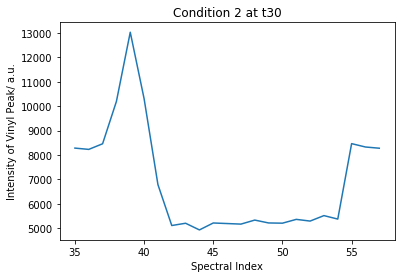

In [9]:
# Condition
df.loc[35:57,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t30')
plt.show()

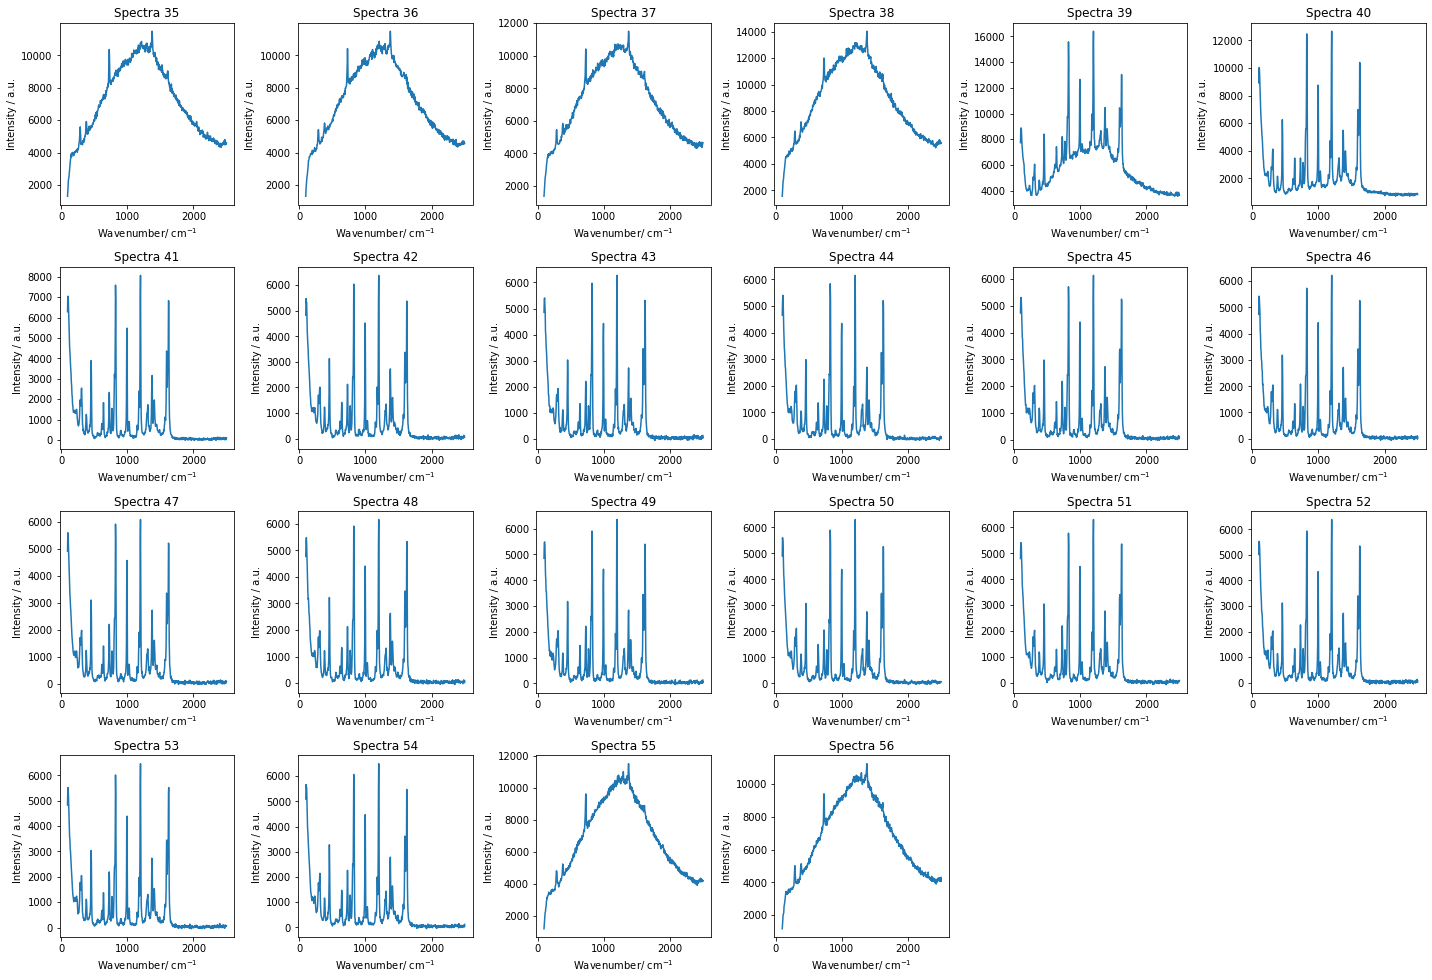

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(35, 57):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-34))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[47:51, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =20)
condition2_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
47,20,4907.0,5594.0,5513.0,5123.0,4789.0,4254.0,3870.0,3665.0,3312.0,...,0.0,45.0,19.0,59.0,75.0,120.0,79.0,64.0,34.0,84.0
48,20,4775.0,5315.0,5481.0,5258.0,4762.0,4243.0,3936.0,3426.0,3162.0,...,-24.0,47.0,42.0,102.0,56.0,112.0,57.0,94.0,11.0,78.0
49,20,4850.0,5436.0,5485.0,5359.0,4834.0,4230.0,4021.0,3571.0,3558.0,...,46.0,91.0,19.0,60.0,82.0,123.0,26.0,90.0,23.0,127.0
50,20,4903.0,5597.0,5469.0,5183.0,4704.0,4173.0,3990.0,3626.0,3371.0,...,-2.0,17.0,51.0,68.0,17.0,58.0,64.0,37.0,48.0,61.0
51,20,4804.0,5411.0,5416.0,5273.0,4682.0,4361.0,3796.0,3617.0,3379.0,...,-26.0,63.0,50.0,47.0,70.0,63.0,61.0,64.0,49.0,93.0


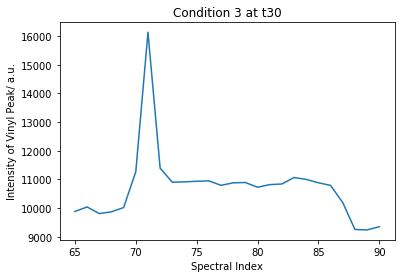

In [12]:
# Condition
df.loc[65:90,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t30')
plt.show()

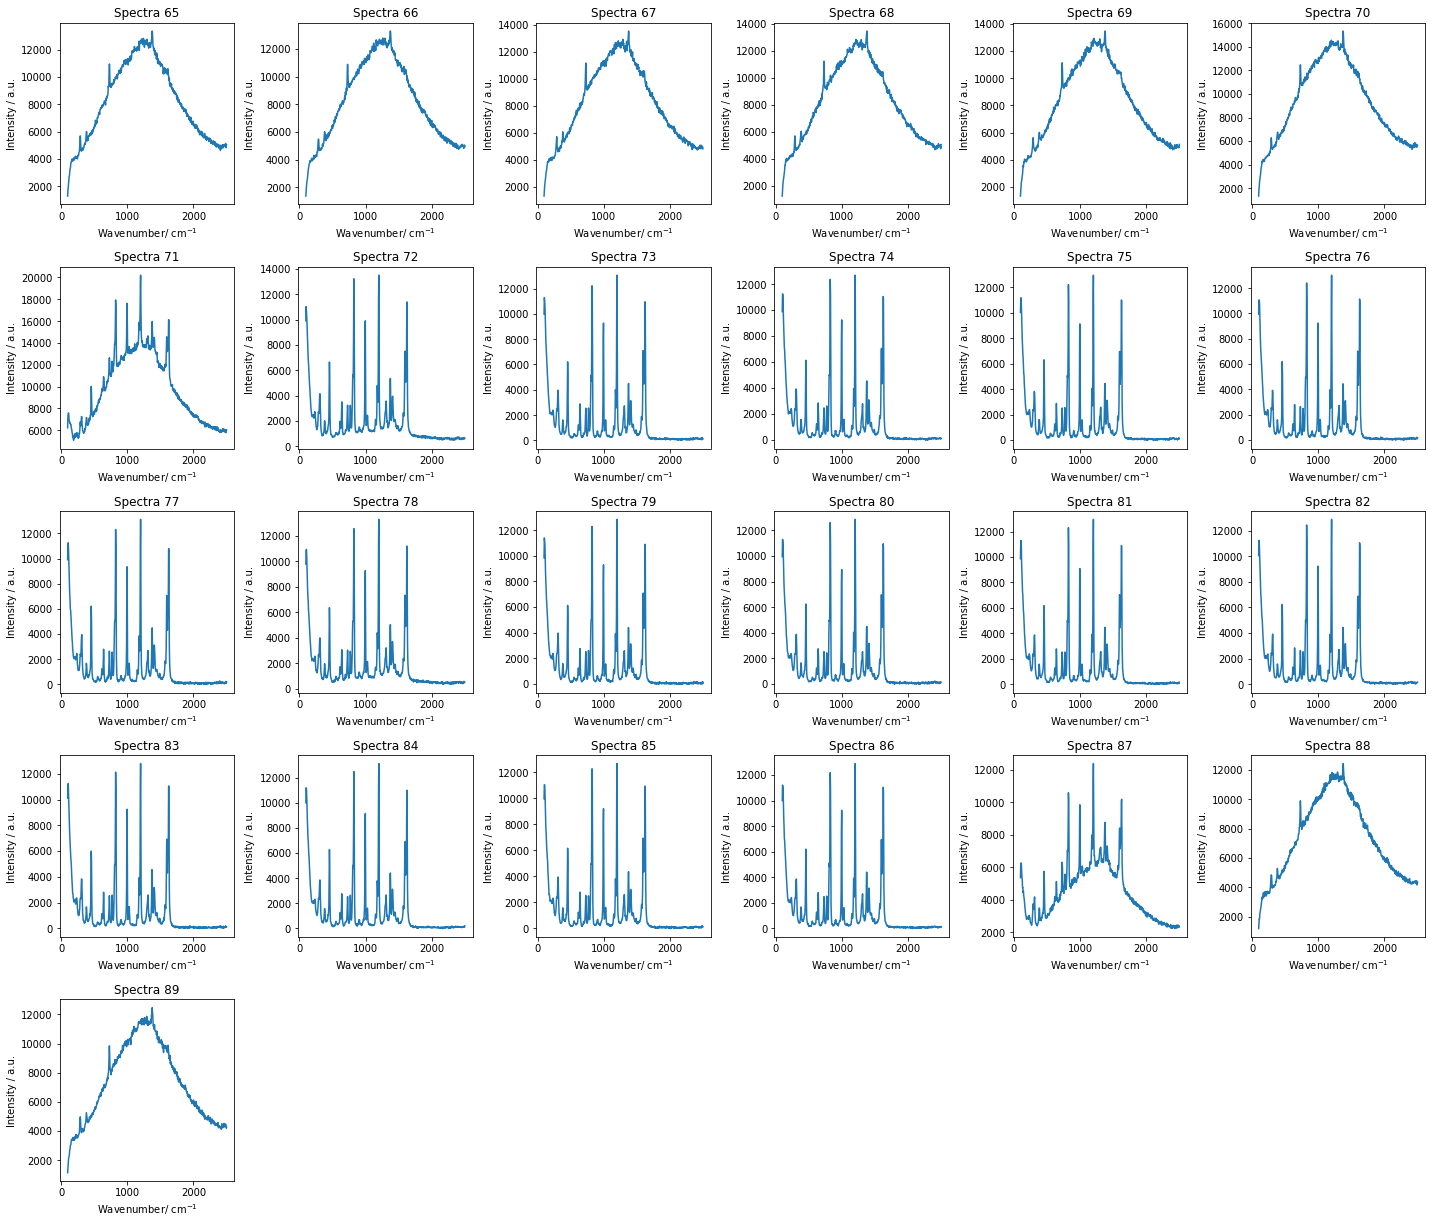

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(65, 90):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-64))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[77:81, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =21)
condition3_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
77,21,9914.0,11111.0,11259.0,10644.0,9720.0,8752.0,7914.0,7145.0,6770.0,...,37.0,161.0,158.0,166.0,130.0,172.0,134.0,157.0,94.0,195.0
78,21,9783.0,10834.0,10934.0,10384.0,9363.0,8611.0,7684.0,7232.0,6831.0,...,392.0,475.0,420.0,522.0,480.0,571.0,531.0,467.0,476.0,507.0
79,21,9840.0,11389.0,11149.0,10848.0,9646.0,8681.0,7964.0,7223.0,6727.0,...,-13.0,70.0,66.0,85.0,96.0,156.0,20.0,118.0,37.0,157.0
80,21,9946.0,11295.0,11184.0,10714.0,9671.0,8783.0,7678.0,7166.0,6673.0,...,18.0,82.0,53.0,140.0,88.0,117.0,95.0,87.0,100.0,136.0
81,21,9872.0,11129.0,11304.0,10837.0,9414.0,8786.0,7850.0,7264.0,6986.0,...,28.0,45.0,53.0,75.0,79.0,151.0,117.0,90.0,64.0,156.0


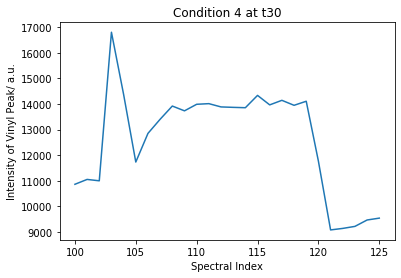

In [15]:
# Condition
df.loc[100:125,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t30')
plt.show()

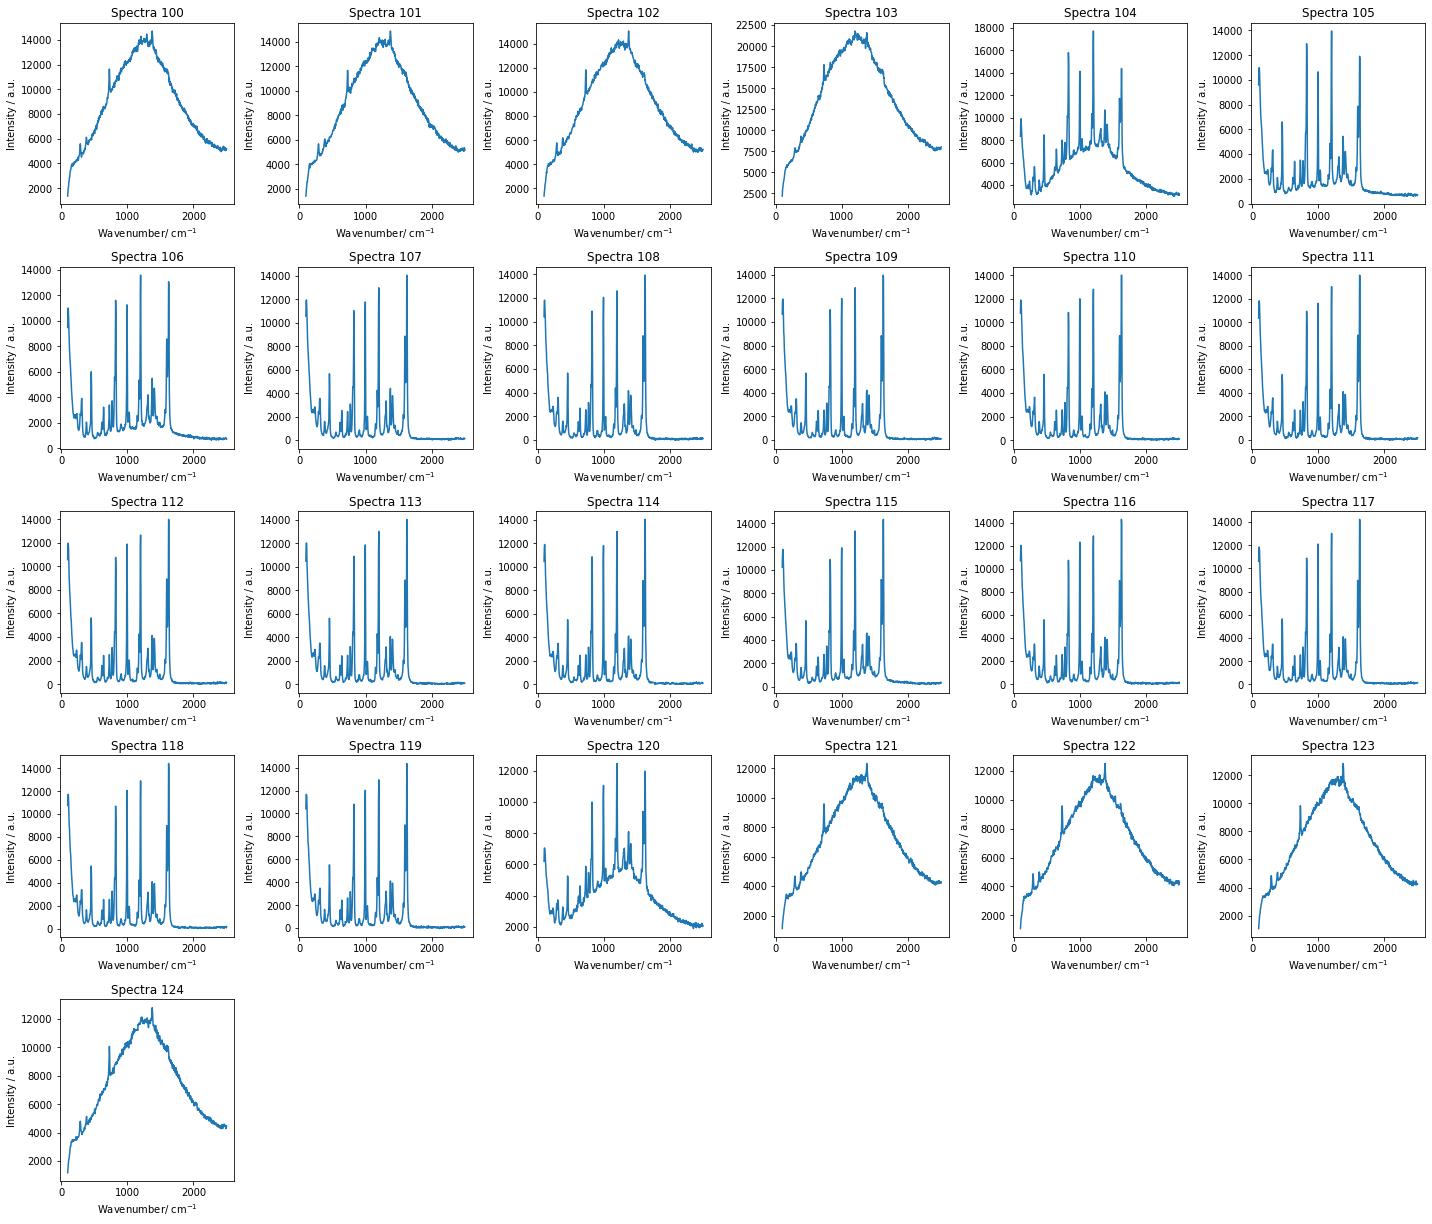

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(100, 125):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-99))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[113:117, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =22)
condition4_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
113,22,10499.0,11711.0,12041.0,11723.0,10169.0,9343.0,8293.0,7926.0,7315.0,...,65.0,106.0,105.0,117.0,103.0,155.0,154.0,128.0,126.0,110.0
114,22,10461.0,11616.0,11894.0,11516.0,10240.0,9324.0,8604.0,7894.0,7240.0,...,72.0,66.0,91.0,110.0,142.0,155.0,82.0,57.0,92.0,92.0
115,22,10247.0,11298.0,11760.0,11166.0,10464.0,9187.0,8383.0,7853.0,7353.0,...,232.0,302.0,294.0,348.0,312.0,365.0,284.0,293.0,283.0,337.0
116,22,10697.0,11679.0,12014.0,11406.0,10366.0,9550.0,8492.0,8059.0,7396.0,...,77.0,66.0,108.0,104.0,93.0,129.0,83.0,161.0,50.0,143.0
117,22,10609.0,11746.0,11836.0,11453.0,10296.0,9443.0,8643.0,7737.0,7361.0,...,95.0,125.0,112.0,138.0,138.0,135.0,127.0,114.0,100.0,139.0


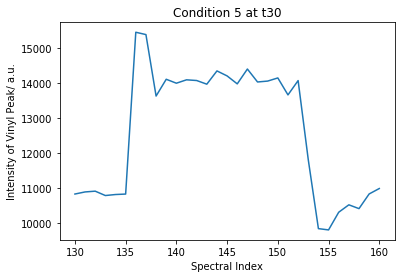

In [18]:
# Condition
df.loc[130:160,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t30')
plt.show()

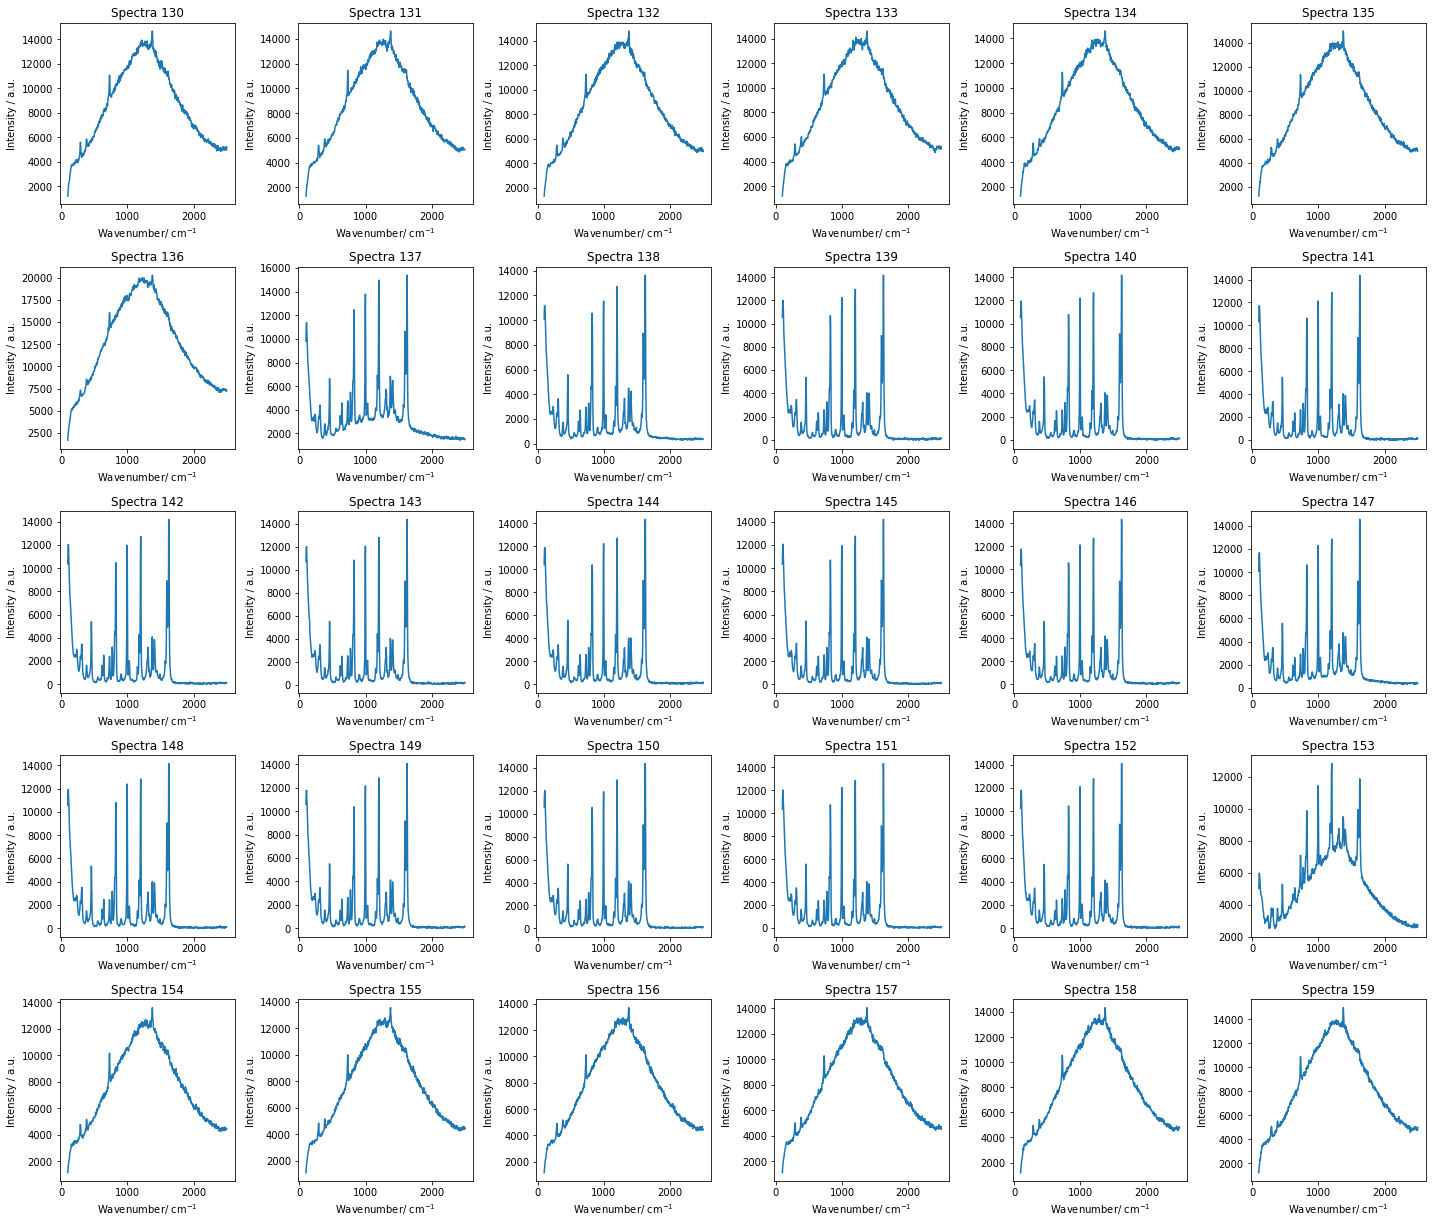

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(130, 160):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-129))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[144:148, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =23)
condition5_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
144,23,10409.0,11601.0,11898.0,11385.0,10434.0,9348.0,8281.0,7905.0,7093.0,...,39.0,91.0,91.0,112.0,76.0,136.0,145.0,124.0,46.0,164.0
145,23,10362.0,11674.0,12078.0,11303.0,10386.0,9412.0,8541.0,7850.0,7496.0,...,71.0,139.0,144.0,132.0,168.0,153.0,78.0,164.0,75.0,114.0
146,23,10331.0,11448.0,11748.0,11198.0,10191.0,9209.0,8523.0,7821.0,7200.0,...,85.0,121.0,67.0,130.0,87.0,169.0,104.0,110.0,92.0,156.0
147,23,10077.0,11274.0,11678.0,10784.0,9982.0,9126.0,8226.0,7572.0,7129.0,...,322.0,385.0,364.0,427.0,417.0,422.0,360.0,471.0,381.0,441.0
148,23,10569.0,11700.0,11929.0,11215.0,10370.0,9231.0,8328.0,7777.0,7240.0,...,5.0,114.0,71.0,89.0,70.0,140.0,96.0,96.0,133.0,127.0


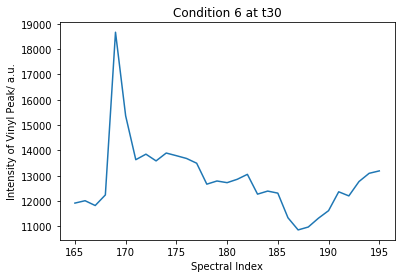

In [21]:
# Condition
df.loc[165:195,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t30')
plt.show()

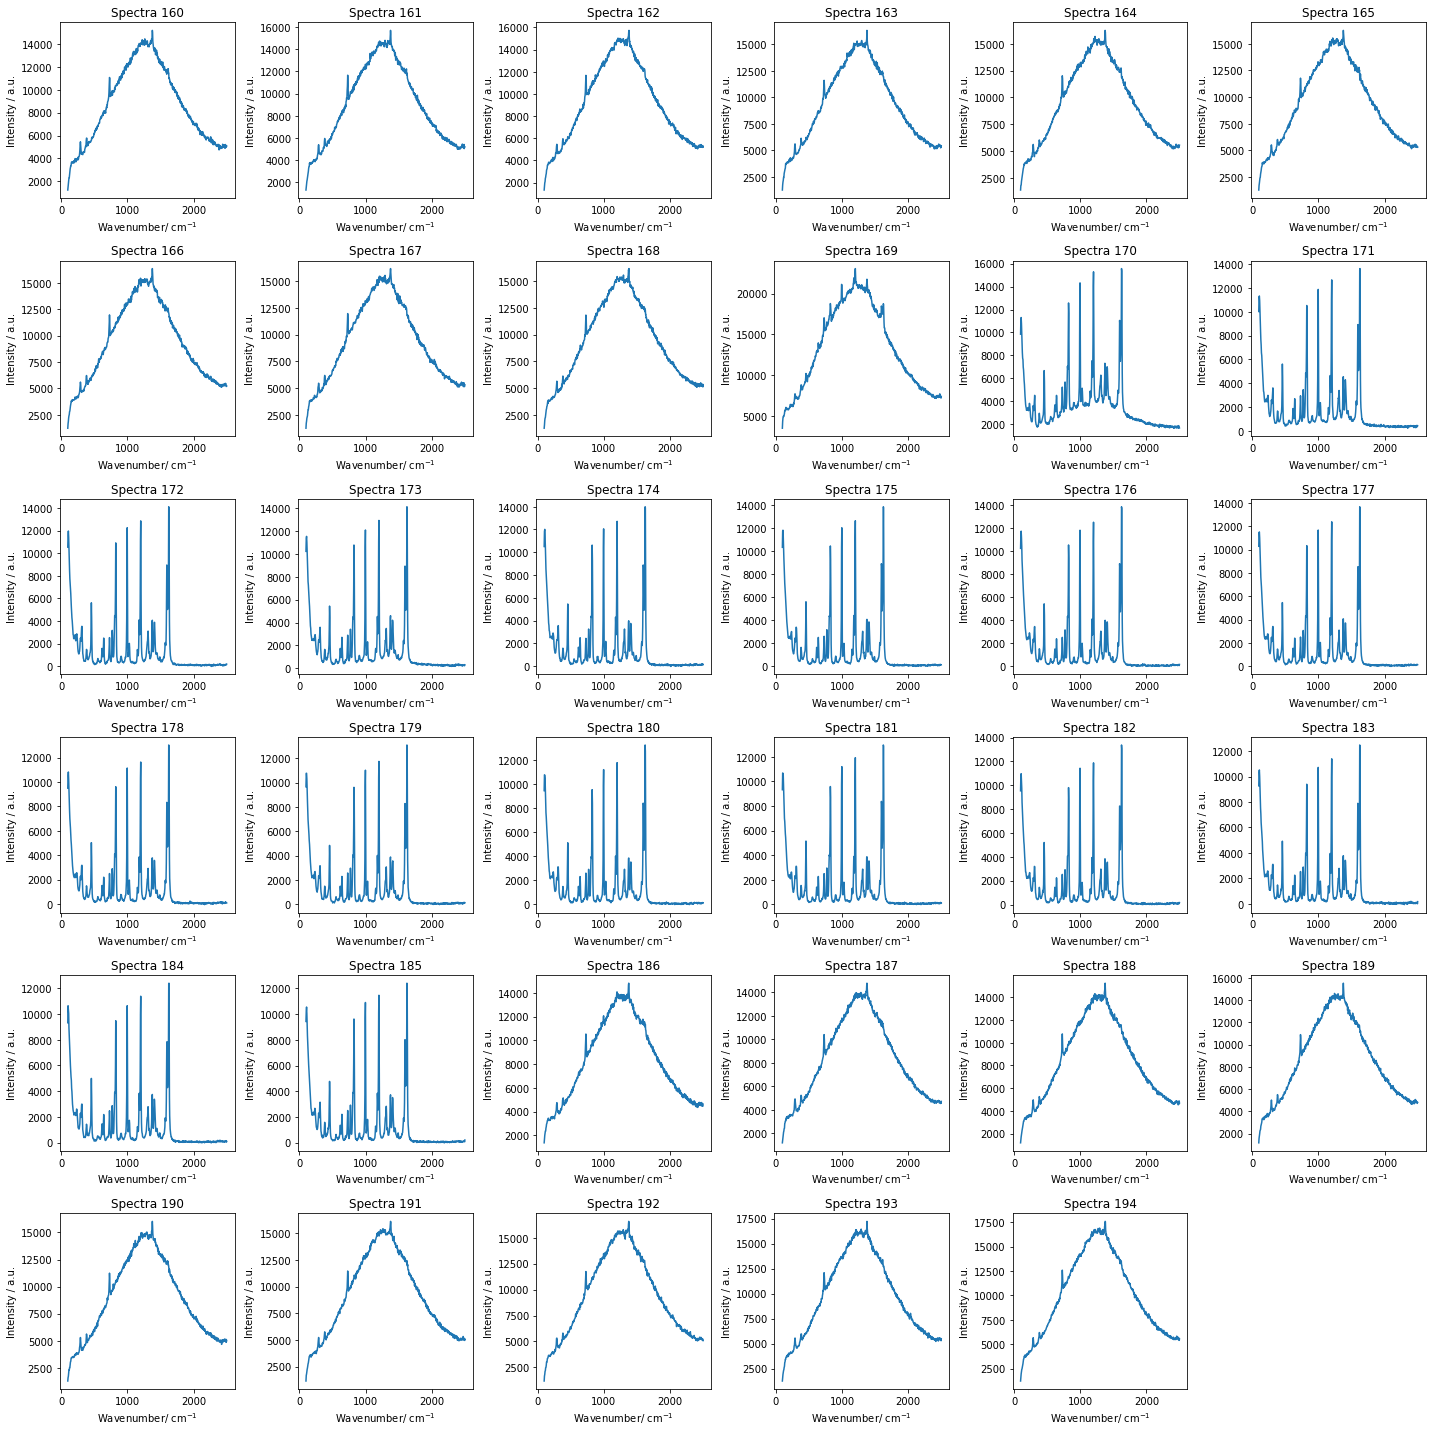

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(160, 195):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-159))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[173:177, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =24)
condition6_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
173,24,10218.0,11320.0,11525.0,11030.0,10188.0,9033.0,8382.0,7570.0,7275.0,...,233.0,286.0,299.0,293.0,296.0,304.0,291.0,228.0,246.0,316.0
174,24,10504.0,11835.0,12011.0,11247.0,10520.0,9416.0,8497.0,7929.0,7295.0,...,74.0,85.0,100.0,201.0,131.0,142.0,148.0,110.0,88.0,149.0
175,24,10337.0,11739.0,11824.0,11262.0,10237.0,9413.0,8599.0,7824.0,7209.0,...,37.0,133.0,122.0,71.0,119.0,148.0,93.0,107.0,108.0,111.0
176,24,10239.0,11438.0,11729.0,11192.0,10416.0,9184.0,8561.0,7717.0,7150.0,...,73.0,87.0,130.0,117.0,135.0,168.0,94.0,137.0,83.0,175.0
177,24,10279.0,11431.0,11512.0,10994.0,10154.0,9066.0,8196.0,7602.0,7208.0,...,69.0,66.0,100.0,132.0,125.0,147.0,165.0,147.0,122.0,119.0


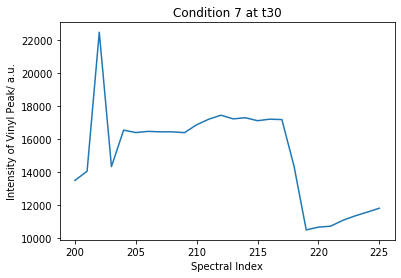

In [24]:
# Condition
df.loc[200:225,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t30')
plt.show()

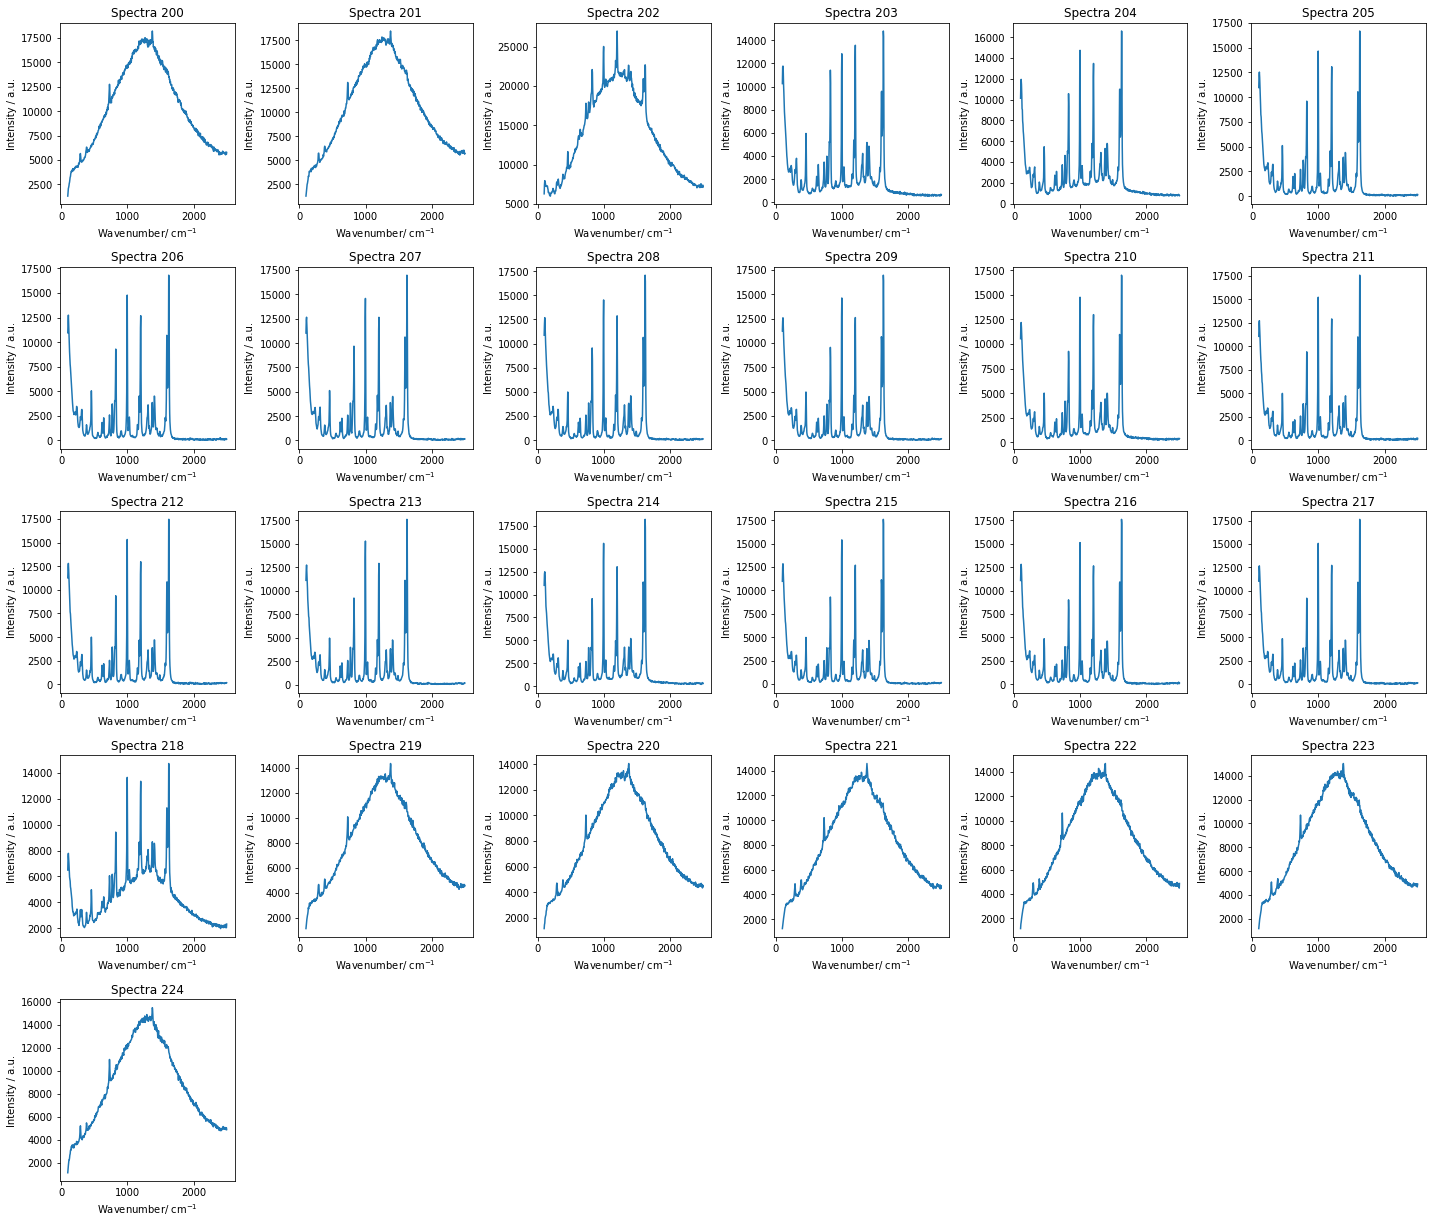

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(200, 225):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-199))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[211:215, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =25)
condition7_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
211,25,11041.0,12405.0,12703.0,11968.0,11054.0,10027.0,9257.0,8538.0,8151.0,...,46.0,129.0,73.0,124.0,92.0,225.0,117.0,121.0,58.0,180.0
212,25,11271.0,12359.0,12796.0,12130.0,11170.0,10111.0,9246.0,8271.0,7666.0,...,104.0,142.0,97.0,150.0,127.0,140.0,130.0,133.0,112.0,170.0
213,25,11121.0,12261.0,12750.0,12009.0,11060.0,10298.0,9121.0,8605.0,7933.0,...,85.0,45.0,104.0,111.0,162.0,156.0,138.0,136.0,119.0,169.0
214,25,11012.0,12248.0,12489.0,12056.0,11147.0,9889.0,8732.0,8348.0,7938.0,...,184.0,260.0,274.0,262.0,270.0,383.0,331.0,269.0,254.0,310.0
215,25,10973.0,12503.0,12842.0,12034.0,11002.0,10135.0,9200.0,8632.0,7991.0,...,41.0,47.0,98.0,92.0,107.0,128.0,132.0,85.0,87.0,159.0


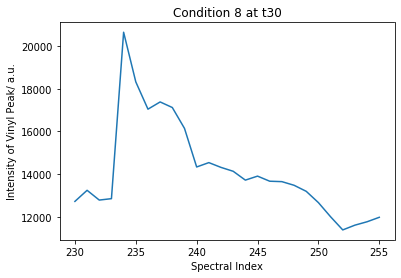

In [27]:
# Condition
df.loc[230:255,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t30')
plt.show()

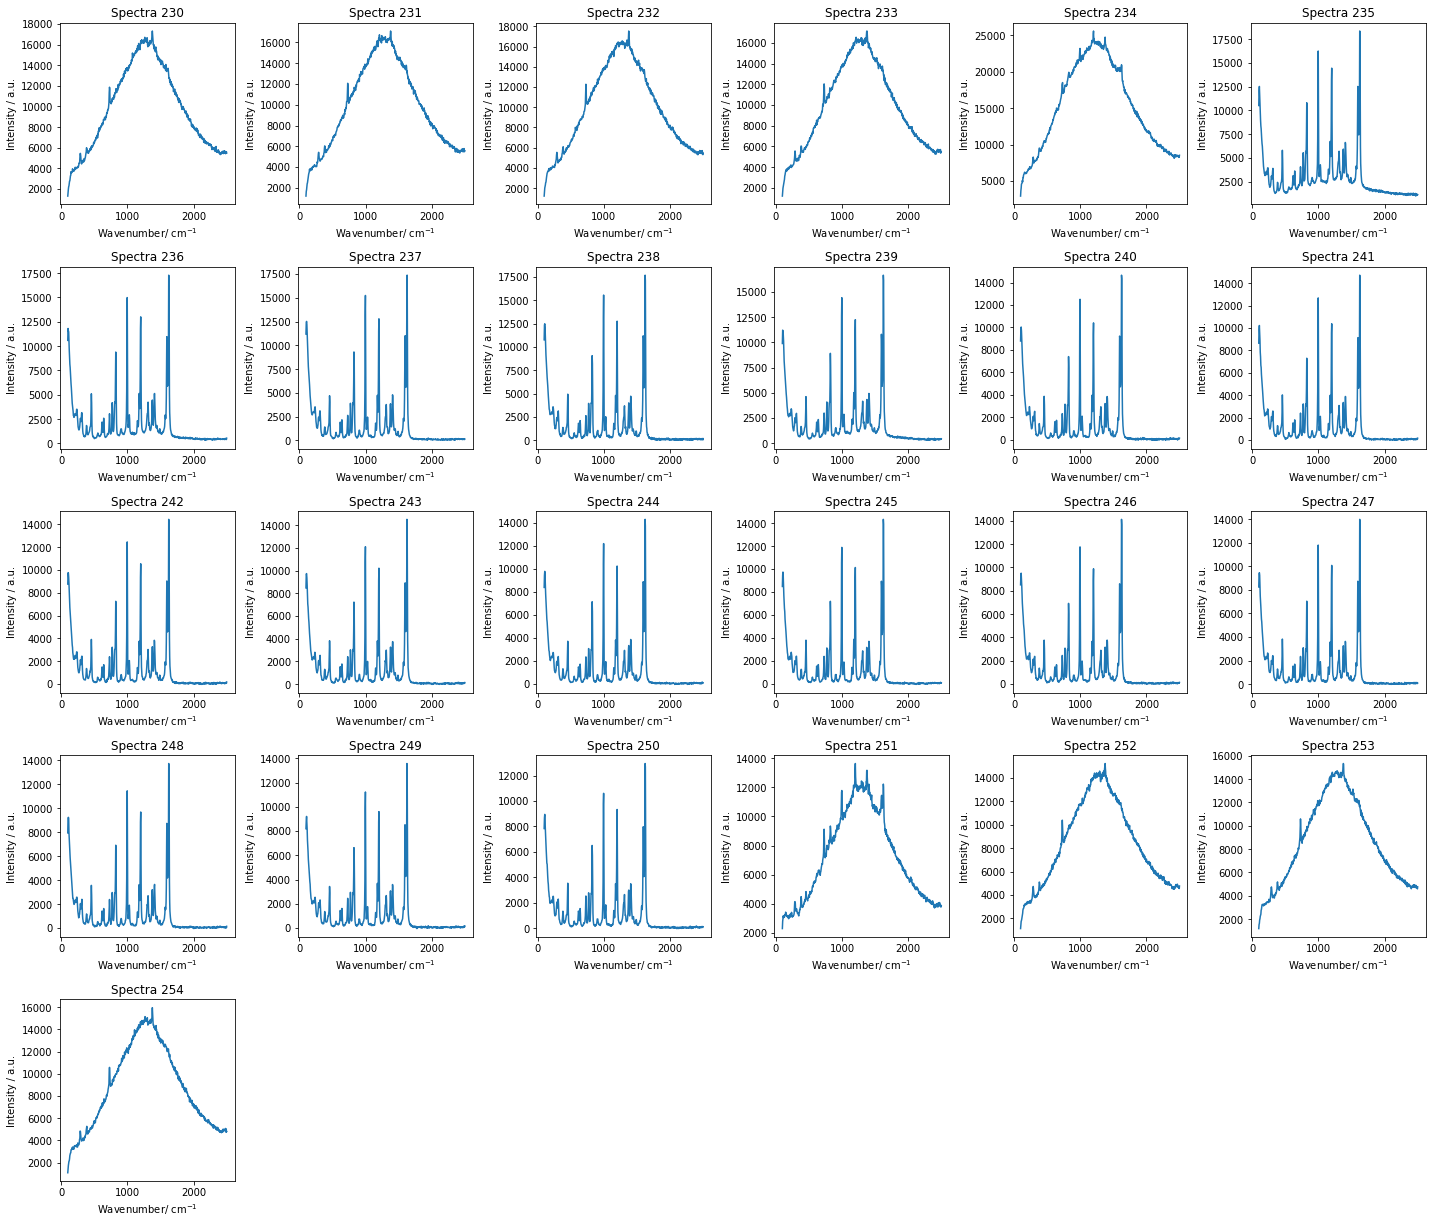

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(230, 255):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-229))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[242:246, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =26)
condition8_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
242,26,8763.0,9768.0,9740.0,9380.0,8829.0,8056.0,7317.0,6708.0,6291.0,...,17.0,100.0,90.0,55.0,102.0,139.0,102.0,90.0,58.0,169.0
243,26,8476.0,9674.0,9735.0,9378.0,8723.0,7818.0,7078.0,6793.0,6194.0,...,32.0,41.0,110.0,96.0,124.0,132.0,90.0,74.0,66.0,142.0
244,26,8398.0,9453.0,9794.0,9385.0,8524.0,7818.0,7233.0,6492.0,6225.0,...,10.0,77.0,67.0,134.0,80.0,165.0,48.0,78.0,64.0,108.0
245,26,8486.0,9472.0,9738.0,9329.0,8388.0,7666.0,7094.0,6576.0,6291.0,...,23.0,73.0,59.0,88.0,82.0,145.0,66.0,112.0,61.0,91.0
246,26,8510.0,9330.0,9508.0,9022.0,8419.0,7654.0,6931.0,6435.0,6081.0,...,22.0,123.0,73.0,66.0,120.0,114.0,74.0,118.0,88.0,139.0


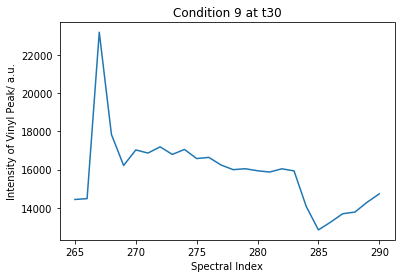

In [30]:
# Condition
df.loc[265:290,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t30')
plt.show()

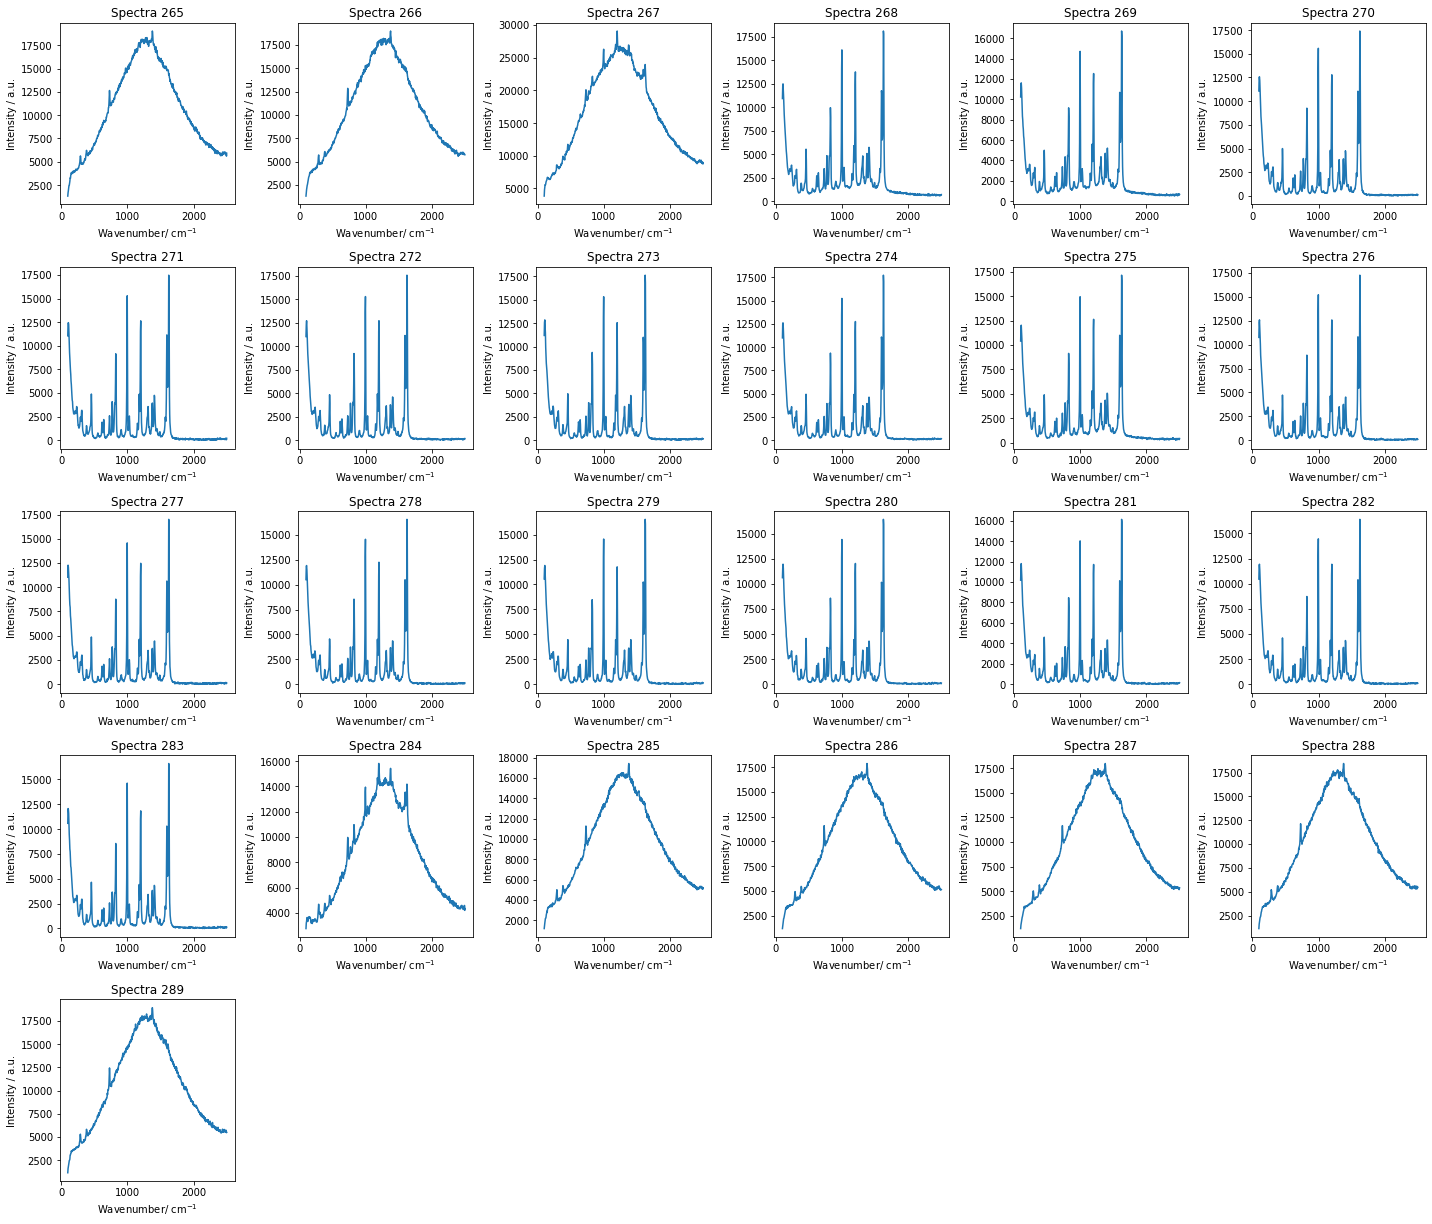

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(265, 290):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-264))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[276:280, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =27)
condition9_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
276,27,10751.0,12297.0,12584.0,11788.0,11056.0,10058.0,8880.0,8383.0,7818.0,...,35.0,92.0,89.0,101.0,110.0,177.0,103.0,76.0,121.0,100.0
277,27,11035.0,12276.0,12082.0,11523.0,10785.0,9794.0,8866.0,8187.0,7933.0,...,25.0,50.0,61.0,153.0,121.0,182.0,105.0,116.0,53.0,124.0
278,27,10492.0,11808.0,11903.0,11466.0,10589.0,9641.0,8825.0,8221.0,7562.0,...,31.0,71.0,95.0,172.0,128.0,144.0,95.0,60.0,85.0,142.0
279,27,10554.0,11601.0,11907.0,11296.0,10441.0,9370.0,8530.0,8021.0,7497.0,...,62.0,76.0,101.0,95.0,103.0,186.0,75.0,72.0,73.0,138.0
280,27,10621.0,11565.0,11964.0,11570.0,10351.0,9494.0,8594.0,7966.0,7506.0,...,70.0,65.0,81.0,100.0,146.0,118.0,112.0,70.0,50.0,110.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
17,19,4939.0,5454.0,5421.0,5299.0,4721.0,4155.0,3954.0,3596.0,3421.0,...,-4.0,43.0,37.0,76.0,107.0,113.0,67.0,52.0,49.0,88.0
18,19,5121.0,5583.0,5504.0,5402.0,4996.0,4202.0,3885.0,3604.0,3346.0,...,79.0,96.0,81.0,82.0,116.0,92.0,68.0,42.0,63.0,65.0
19,19,5075.0,5508.0,5420.0,5411.0,4567.0,4407.0,3975.0,3560.0,3467.0,...,7.0,67.0,36.0,69.0,93.0,120.0,35.0,41.0,92.0,89.0
20,19,5037.0,5530.0,5786.0,5323.0,4922.0,4323.0,4027.0,3712.0,3564.0,...,56.0,67.0,54.0,94.0,107.0,120.0,88.0,125.0,20.0,95.0
21,19,5002.0,5690.0,5553.0,5247.0,4706.0,4307.0,3903.0,3732.0,3377.0,...,40.0,115.0,78.0,44.0,98.0,89.0,71.0,37.0,86.0,110.0
47,20,4907.0,5594.0,5513.0,5123.0,4789.0,4254.0,3870.0,3665.0,3312.0,...,0.0,45.0,19.0,59.0,75.0,120.0,79.0,64.0,34.0,84.0
48,20,4775.0,5315.0,5481.0,5258.0,4762.0,4243.0,3936.0,3426.0,3162.0,...,-24.0,47.0,42.0,102.0,56.0,112.0,57.0,94.0,11.0,78.0
49,20,4850.0,5436.0,5485.0,5359.0,4834.0,4230.0,4021.0,3571.0,3558.0,...,46.0,91.0,19.0,60.0,82.0,123.0,26.0,90.0,23.0,127.0
50,20,4903.0,5597.0,5469.0,5183.0,4704.0,4173.0,3990.0,3626.0,3371.0,...,-2.0,17.0,51.0,68.0,17.0,58.0,64.0,37.0,48.0,61.0
51,20,4804.0,5411.0,5416.0,5273.0,4682.0,4361.0,3796.0,3617.0,3379.0,...,-26.0,63.0,50.0,47.0,70.0,63.0,61.0,64.0,49.0,93.0


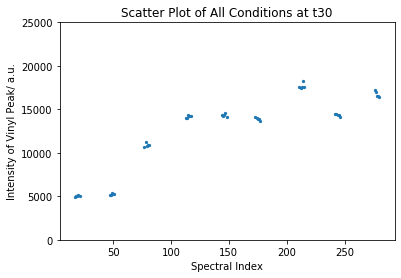

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t30')
plt.ylim(0, 25000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
17,19,4939.0,5454.0,5421.0,5299.0,4721.0,4155.0,3954.0,3596.0,3421.0,...,-4.0,43.0,37.0,76.0,107.0,113.0,67.0,52.0,49.0,88.0
18,19,5121.0,5583.0,5504.0,5402.0,4996.0,4202.0,3885.0,3604.0,3346.0,...,79.0,96.0,81.0,82.0,116.0,92.0,68.0,42.0,63.0,65.0
19,19,5075.0,5508.0,5420.0,5411.0,4567.0,4407.0,3975.0,3560.0,3467.0,...,7.0,67.0,36.0,69.0,93.0,120.0,35.0,41.0,92.0,89.0
20,19,5037.0,5530.0,5786.0,5323.0,4922.0,4323.0,4027.0,3712.0,3564.0,...,56.0,67.0,54.0,94.0,107.0,120.0,88.0,125.0,20.0,95.0
21,19,5002.0,5690.0,5553.0,5247.0,4706.0,4307.0,3903.0,3732.0,3377.0,...,40.0,115.0,78.0,44.0,98.0,89.0,71.0,37.0,86.0,110.0
47,20,4907.0,5594.0,5513.0,5123.0,4789.0,4254.0,3870.0,3665.0,3312.0,...,0.0,45.0,19.0,59.0,75.0,120.0,79.0,64.0,34.0,84.0
48,20,4775.0,5315.0,5481.0,5258.0,4762.0,4243.0,3936.0,3426.0,3162.0,...,-24.0,47.0,42.0,102.0,56.0,112.0,57.0,94.0,11.0,78.0
49,20,4850.0,5436.0,5485.0,5359.0,4834.0,4230.0,4021.0,3571.0,3558.0,...,46.0,91.0,19.0,60.0,82.0,123.0,26.0,90.0,23.0,127.0
50,20,4903.0,5597.0,5469.0,5183.0,4704.0,4173.0,3990.0,3626.0,3371.0,...,-2.0,17.0,51.0,68.0,17.0,58.0,64.0,37.0,48.0,61.0
51,20,4804.0,5411.0,5416.0,5273.0,4682.0,4361.0,3796.0,3617.0,3379.0,...,-26.0,63.0,50.0,47.0,70.0,63.0,61.0,64.0,49.0,93.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1627.978510']].groupby('Condition').describe()

1627.978510                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
19                5.0   4893.6   99.520350   4760.0   4860.0   4894.0   
20                5.0   5256.8   85.274263   5168.0   5206.0   5215.0   
21                5.0  10820.4   67.463323  10725.0  10792.0  10816.0   
22                5.0  14034.2  204.816259  13855.0  13869.0  13966.0   
23                5.0  14197.6  187.582782  13982.0  14036.0  14210.0   
24                5.0  13690.8  159.634583  13495.0  13587.0  13683.0   
25                5.0  17260.4  124.785015  17116.0  17209.0  17228.0   
26                5.0  13952.0  274.219802  13672.0  13723.0  13910.0   
27                5.0  16173.0  284.147849  15940.0  15998.0  16046.0   

                             
               75%      max  
Condition                    
19          4919.0   5035.0  
20          5333.0   5362.0  
21         10879.0  10890.0  
22         14144.0  14337.0  
23         14353.0  14407.0  
24         13792.0  13897.0  
25         17298.0  17451.0  
26         14137.0  14318.0  
27         16242.0  16639.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_t30.csv')